In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/CODE/DATA7703/
%ls

Mounted at /content/drive
/content/drive/My Drive/CODE/DATA7703
pokemonfun2.csv  pokemonfun.csv  wk2_prac_tute.pdf


In [ ]:
A = np.random.randint((5,4))
print(A[0])

4


In [ ]:
print(np.random.random((2, 4)))

[[0.7172904  0.62077034 0.54377157 0.57344549]
 [0.90664738 0.25895784 0.61526784 0.08981192]]


In [ ]:
import numpy as np
import pandas as pd

A = np.random.randint(10, size=(5, 4))
print("A mat",A)
df = pd.DataFrame(A,columns  = ['f1','f2','f3','f4'])

df_std  = (df - df.mean()) / (df.std())
df_std


,f1,f2,f3,f4
0,-0.395628,0.670820,0.000000,-0.687552
1,-0.065938,1.229837,-1.460593,-0.423109
2,-1.384699,0.111803,1.095445,-0.687552
3,1.252823,-1.006231,-0.365148,1.692435
4,0.593442,-1.006231,0.730297,0.105777


In [ ]:
import numpy as np
import pandas as pd

A = np.random.randint(10, size=(5, 4))

df = pd.DataFrame(A,columns  = ['f1','f2','f3','f4'])

# Step 2: Standardize the dataset
df_std  = (df - df.mean()) / (df.std())
df_std

# Find the covariance matrix for the given dataset

# There are two methods to do this

#     Sample formula
#     Population formula

# Note: Any of the formula, can be used result will be same
# Covariance population formula (divide by N)


df_cov = np.cov(df_std.T, bias = 1)
df_cov


# Covariance sample formula (divide by N-1)

cov_mat = np.cov(df_std.T, bias = 0)
cov_mat


## verify varinace(f1) is as expected
print('var(f1) (population formula): ',((df_std.f1)**2).sum()/5)
print('var(f1) (sample formula): ',((df_std.f1)**2).sum()/4)


# Calculate Eigenvalue and eigen vector

eigen_val, eigen_vectors = np.linalg.eig(cov_mat)


# Sort the eigen values and their correspoding eigen vectors
# Since the eigen values are already sorted in our case, so no need of this step
print(eigen_vectors)
n_components=2

# pick top n_components eigen values and their corresponding eigen vectors

top_eigen_vectors = eigen_vectors[:,:n_components]

print("top eigen vectors",top_eigen_vectors)

top_eigen_vectors.shape
print("df_std shape",df_std.shape)
transformed_data = np.matmul(np.array(df_std),top_eigen_vectors)
pd.DataFrame(data = transformed_data
             , columns = ['principal component '+ str(i+1) for i in range(n_components)])


transformed_data.shape



var(f1) (population formula):  0.8000000000000002
var(f1) (sample formula):  1.0000000000000002
[[-0.56501346  0.57449649 -0.59172325 -0.02402419]
 [ 0.37402575 -0.37321979 -0.69999076 -0.48044216]
 [ 0.21969005 -0.15853936 -0.399259    0.875896  ]
 [ 0.70185526  0.71100355  0.02165146 -0.0374748 ]]
top eigen vectors [[-0.56501346  0.57449649]
 [ 0.37402575 -0.37321979]
 [ 0.21969005 -0.15853936]
 [ 0.70185526  0.71100355]]
df_std shape (5, 4)


(5, 2)

In [ ]:


from sklearn.decomposition import PCA
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(df_std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc '+ str(i+1) for i in range(n_components)])#pc = principal component
    



principalDf



,pc 1,pc 2
0,-1.793481,0.196281
1,2.107030,-0.726303
2,1.394326,1.193358
3,-0.132592,-0.572890
4,-1.575283,-0.090446


In [ ]:
import pandas as pd
data = pd.read_csv('pokemonfun2.csv').dropna().values
# X, y = data[:,:7], data[:,7:8]
X, y = data[:], data[:,7:8]
print(X.shape,y.shape)

(780, 8) (780, 1)


In [ ]:
import numpy as np
import pandas as pd


df = pd.DataFrame(X,columns  = ['f1','f2','f3','f4','f5','f6','f7','f8'])

# Step 2: Standardize the dataset
# df_std  = (df - df.mean()) / (df.std())
# df_std

# Find the covariance matrix for the given dataset

# There are two methods to do this

#     Sample formula
#     Population formula

# Note: Any of the formula, can be used result will be same
# Covariance population formula (divide by N)

df_std=df
df_cov = np.cov(df_std.T, bias = 1)
df_cov


# Covariance sample formula (divide by N-1)

cov_mat = np.cov(df_std.T, bias = 0)
cov_mat


## verify varinace(f1) is as expected
print('var(f1) (population formula): ',((df_std.f1)**2).sum()/5)
print('var(f1) (sample formula): ',((df_std.f1)**2).sum()/4)


# Calculate Eigenvalue and eigen vector

eigen_val, eigen_vectors = np.linalg.eig(cov_mat)


# Sort the eigen values and their correspoding eigen vectors
# Since the eigen values are already sorted in our case, so no need of this step
print(eigen_val)
n_components=2

# pick top n_components eigen values and their corresponding eigen vectors

top_eigen_vectors = eigen_vectors[:,:n_components]

print("top eigen vectors",top_eigen_vectors)

top_eigen_vectors.shape
print("df_std shape",df_std.shape)
transformed_data = np.matmul(np.array(df_std),top_eigen_vectors)
pd.DataFrame(data = transformed_data
             , columns = ['principal component '+ str(i+1) for i in range(n_components)])


transformed_data.shape


var(f1) (population formula):  1104384.0
var(f1) (sample formula):  1380480.0
[1.26503971e+04 1.88440966e+03 8.97299704e+02 7.40931503e+02
 5.28703461e+02 3.92881387e+02 2.31429969e+02 6.03471992e-01]
top eigen vectors [[ 0.12625494  0.43242109]
 [ 0.13064275  0.28019777]
 [ 0.00623237  0.00542911]
 [ 0.11139121  0.22851787]
 [ 0.08634032  0.5550341 ]
 [ 0.09052539  0.38279364]
 [ 0.02268424  0.42561055]
 [ 0.9687008  -0.21566911]]
df_std shape (780, 8)


(780, 2)

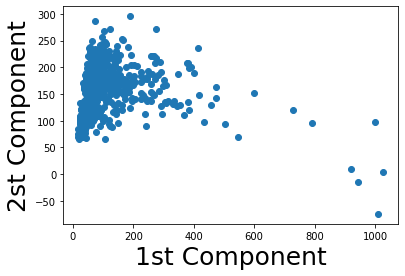

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])

plt.xlabel('1st Component', size=25)
plt.ylabel('2st Component', size=25)
# plt.legend(np.unique(y))
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc '+ str(i+1) for i in range(n_components)])#pc = principal component
    



principalDf

,pc 1,pc 2
0,-49.860908,-4.127291
1,56.987365,-70.319121
2,-64.766321,30.087850
3,-45.575762,-4.610943
4,45.381801,-88.164602
...,...,...
775,924.727053,148.694342
776,-43.702221,-67.630975
777,818.192591,141.383120
778,180.426987,-33.514666


In [ ]:
from sklearn.decomposition import PCA
import scipy.io as si
import numpy as np
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
X_new = pd.DataFrame(X_new)
classes = np.unique(y)

[[ 0.48740878  0.40425289  0.01161932  0.31764365  0.4930281   0.40196143
   0.30549974]
 [ 0.07347851  0.65178401  0.00241772  0.01405972 -0.38459944  0.18827656
  -0.62145813]]
[2444.78756464  974.42062554]
[1380.91791951  871.80736858]


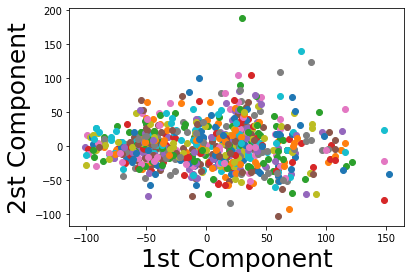

In [ ]:
# Visualization
for i in classes:
    current_x = (X_new.iloc[y == i, :]).to_numpy()
    plt.scatter(current_x[:, 0], current_x[:, 1])

plt.xlabel('1st Component', size=25)
plt.ylabel('2st Component', size=25)
# plt.legend(np.unique(y))
plt.show()